Greyscale ℓ2-TV Denoising
=========================

This example demonstrates the use of class [tvl2.TVL2Deconv](http://sporco.rtfd.org/en/latest/sporco.admm.tvl2.html#sporco.admm.tvl2.TVL2Deconv) for removing Gaussian white noise from a greyscale image using Total Variation regularization with an ℓ2 data fidelity term (ℓ2-TV denoising). (This class is primarily intended for deconvolution problems, but can be applied to denoising problems by choosing an impulse filter as the blurring kernel.)

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted Gaussian white noise with a 0.05 standard deviation.

In [3]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.05, img.shape)

Set regularization parameter and options for ℓ2-TV deconvolution solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 0.04
opt = tvl2.TVL2Deconv.Options({'Verbose': True, 'MaxMainIter': 200,
                               'gEvalY': False})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl2.TVL2Deconv(np.ones((1,1)), imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ         
----------------------------------------------------------------


   0  7.78e+02  8.32e+01  1.74e+04  6.73e-01  4.51e-01  1.80e-01
   1  6.29e+02  2.31e+02  9.95e+03  2.92e-01  1.45e-01  1.80e-01
   2  6.07e+02  2.53e+02  8.86e+03  1.67e-01  9.50e-02  2.56e-01


   3  5.98e+02  2.66e+02  8.31e+03  1.05e-01  6.76e-02  3.39e-01
   4  5.93e+02  2.68e+02  8.14e+03  7.12e-02  5.32e-02  4.24e-01


   5  5.90e+02  2.69e+02  8.03e+03  5.04e-02  4.27e-02  4.90e-01
   6  5.88e+02  2.68e+02  7.99e+03  3.73e-02  3.12e-02  4.90e-01


   7  5.87e+02  2.68e+02  7.96e+03  2.85e-02  2.24e-02  4.90e-01
   8  5.86e+02  2.68e+02  7.94e+03  2.24e-02  1.84e-02  5.53e-01


   9  5.85e+02  2.68e+02  7.93e+03  1.78e-02  1.64e-02  6.11e-01
  10  5.85e+02  2.68e+02  7.92e+03  1.45e-02  1.36e-02  6.11e-01
  11  5.84e+02  2.68e+02  7.92e+03  1.19e-02  1.09e-02  6.11e-01


  12  5.84e+02  2.67e+02  7.91e+03  9.96e-03  8.83e-03  6.11e-01
  13  5.84e+02  2.67e+02  7.91e+03  8.45e-03  7.21e-03  6.11e-01
  14  5.84e+02  2.67e+02  7.91e+03  7.27e-03  6.00e-03  6.11e-01


  15  5.83e+02  2.67e+02  7.91e+03  6.30e-03  5.45e-03  6.72e-01
  16  5.83e+02  2.67e+02  7.90e+03  5.52e-03  4.95e-03  6.72e-01
  17  5.83e+02  2.67e+02  7.90e+03  4.88e-03  4.30e-03  6.72e-01


  18  5.83e+02  2.67e+02  7.90e+03  4.34e-03  3.70e-03  6.72e-01
  19  5.83e+02  2.67e+02  7.90e+03  3.90e-03  3.19e-03  6.72e-01


  20  5.83e+02  2.67e+02  7.90e+03  3.52e-03  3.02e-03  7.43e-01
  21  5.83e+02  2.67e+02  7.90e+03  3.20e-03  2.85e-03  7.43e-01
  22  5.83e+02  2.67e+02  7.90e+03  2.91e-03  2.56e-03  7.43e-01


  23  5.83e+02  2.67e+02  7.90e+03  2.66e-03  2.30e-03  7.43e-01
  24  5.83e+02  2.67e+02  7.90e+03  2.45e-03  2.05e-03  7.43e-01


  25  5.83e+02  2.67e+02  7.90e+03  2.26e-03  1.83e-03  7.43e-01
  26  5.83e+02  2.67e+02  7.90e+03  2.09e-03  1.79e-03  8.26e-01


  27  5.83e+02  2.67e+02  7.90e+03  1.94e-03  1.74e-03  8.26e-01
  28  5.83e+02  2.67e+02  7.90e+03  1.80e-03  1.58e-03  8.26e-01


  29  5.83e+02  2.67e+02  7.90e+03  1.67e-03  1.46e-03  8.26e-01
  30  5.83e+02  2.67e+02  7.90e+03  1.56e-03  1.34e-03  8.26e-01
  31  5.83e+02  2.67e+02  7.90e+03  1.46e-03  1.22e-03  8.26e-01


  32  5.83e+02  2.67e+02  7.90e+03  1.38e-03  1.10e-03  8.26e-01
  33  5.83e+02  2.67e+02  7.90e+03  1.29e-03  1.08e-03  9.23e-01


  34  5.83e+02  2.67e+02  7.90e+03  1.22e-03  1.10e-03  9.23e-01
  35  5.83e+02  2.67e+02  7.90e+03  1.14e-03  1.04e-03  9.23e-01
  36  5.83e+02  2.67e+02  7.90e+03  1.08e-03  9.85e-04  9.23e-01


  37  5.83e+02  2.67e+02  7.90e+03  1.02e-03  8.88e-04  9.23e-01
  38  5.83e+02  2.67e+02  7.90e+03  9.61e-04  8.20e-04  9.23e-01
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL2Deconv solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Deconv solve time:  5.51 s
Noisy image PSNR:    25.30 dB
Denoised image PSNR: 32.61 dB


Display reference, corrupted, and denoised images.

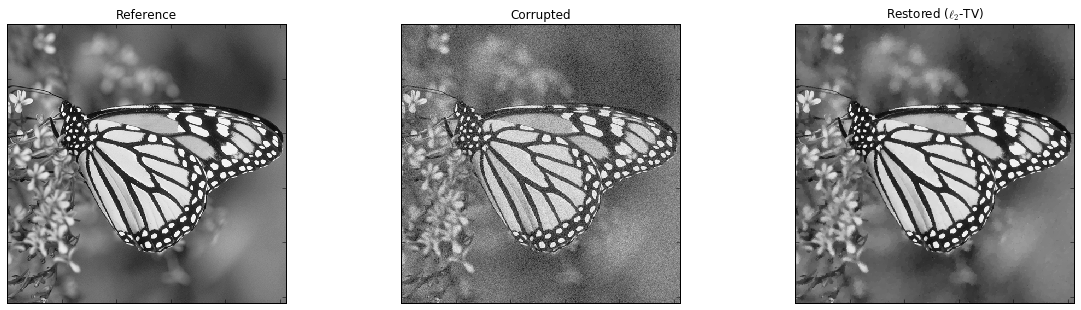

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, fgrf=fig, title='Reference')
plot.subplot(1, 3, 2)
plot.imview(imgn, fgrf=fig, title='Corrupted')
plot.subplot(1, 3, 3)
plot.imview(imgr, fgrf=fig, title=r'Restored ($\ell_2$-TV)')
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

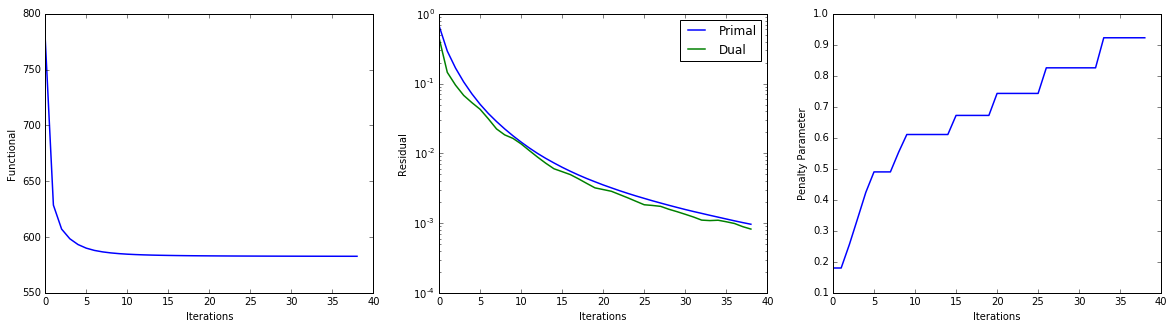

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, fgrf=fig, xlbl='Iterations', ylbl='Functional')
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, fgrf=fig,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'])
plot.subplot(1, 3, 3)
plot.plot(its.Rho, fgrf=fig, xlbl='Iterations', ylbl='Penalty Parameter')
fig.show()